In [ ]:
!apt install tesseract-ocr   # install Tesseract OCR engine and its language data files
!pip install pytesseract  # install the pytesseract package.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,202 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3

In [ ]:
import cv2
import numpy as np
import pytesseract 
from google.colab.patches import cv2_imshow   # to show the images

In [ ]:
# Load the image
image = cv2.imread("/content/123.jpg")

# Clean the image using thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

In [ ]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Find the contour with the largest area (assumed to be the number plate)
max_area = 0
best_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        best_contour = contour

# Extract the bounding box of the number plate
x, y, w, h = cv2.boundingRect(best_contour)
plate = image[y:y+h, x:x+w]

In [ ]:
blurred = cv2.GaussianBlur(plate, (5, 5), 0)

In [ ]:
gray_plate = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

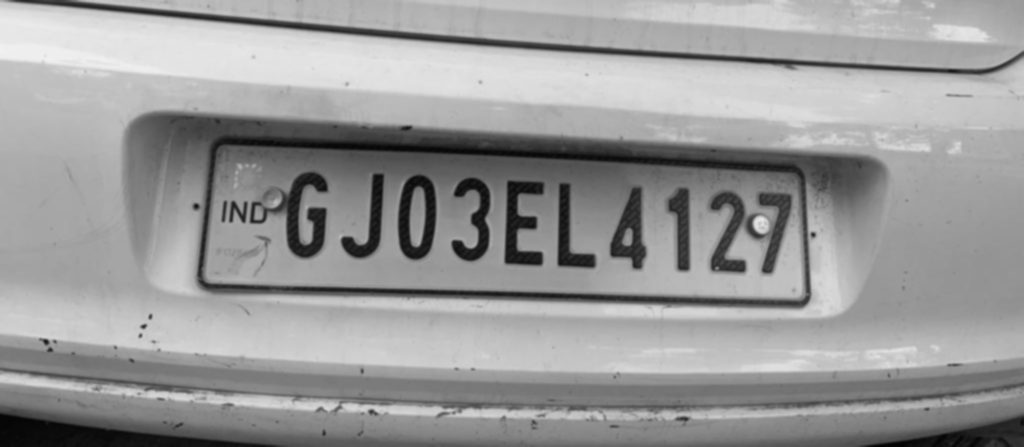

In [ ]:
cv2_imshow(gray_plate)

In [ ]:
_, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

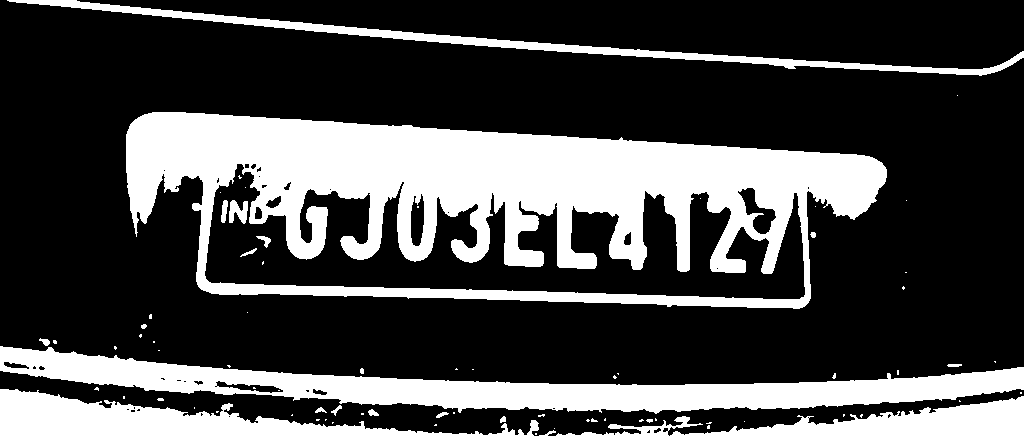

In [ ]:
cv2_imshow(thresh_plate) #Type of image segmentation, where we change the pixels of an image to make the image easier to analyze

In [ ]:
# Apply OCR on the thresholded image
text = pytesseract.image_to_string(thresh_plate)
text

' \n\x0c'

In [ ]:
template = cv2.imread("/content/123.jpg", 0)

In [ ]:
result = cv2.matchTemplate(gray_plate, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
if np.max(result) > threshold:

    print("The font matches")
else:
    print("The font does not match")


The font matches
